In [1]:
import pandas as pd

# # Install scikit-learn
# %pip install scikit-learn


from sklearn.linear_model import (
    LinearRegression,
)  # used to create a linear regression model.
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error,
)  # evaluate the performance of machine learning models
import numpy as np
import matplotlib.pyplot as plt

# %pip install statsmodels
import statsmodels.api as sm


In [3]:
# Load dataset
df = pd.read_excel('E:/Code/STAT3013.-P12_Nhom4/Dataset/Gold_data_filtered.xlsx')

In [4]:
# Display the first few rows
print(df.head())

# Check for any missing values
print(df.isnull().sum())

        date         open         high          low        close  volume
0 2019-03-01  1312.199951  1312.199951  1288.900024  1296.400024     110
1 2019-03-04  1285.500000  1287.000000  1281.900024  1284.800049      28
2 2019-03-05  1287.000000  1287.000000  1282.000000  1282.000000     114
3 2019-03-06  1287.099976  1287.099976  1282.599976  1284.900024      14
4 2019-03-07  1281.000000  1284.599976  1281.000000  1283.800049      11
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [5]:
# Check the data types of all columns in the DataFrame
print(df.dtypes)


date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
dtype: object



SPLITING DATA 7-2-1


In [6]:
# Split the data into training, testing, and validation sets (7:2:1)
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [7]:
# Part of preparing data for training model
x_train = np.array(train_data.index).reshape(-1, 1) #reshapes the array into a 2D array
y_train = np.array(train_data['close']) #converts the "close" column of the train_data DataFrame into a 1D NumPy array

In [8]:
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [9]:
# The trained model uses the x_test data to make predictions, and the predicted values are stored in y_pred.
# Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data["close"])
y_pred = model.predict(x_test)

# Validation process
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data["close"])
y_pred_val = model.predict(x_val)

In [10]:
# Create index predict for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[2125.15932845 2125.64241527 2126.12550208 2126.6085889  2127.09167571
 2127.57476252 2128.05784934 2128.54093615 2129.02402297 2129.50710978
 2129.9901966  2130.47328341 2130.95637022 2131.43945704 2131.92254385
 2132.40563067 2132.88871748 2133.37180429 2133.85489111 2134.33797792
 2134.82106474 2135.30415155 2135.78723837 2136.27032518 2136.75341199
 2137.23649881 2137.71958562 2138.20267244 2138.68575925 2139.16884606]


In [11]:
# Calculate accuracy for each model
# rmse
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)

test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

# mae
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

# mape
test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100


print("Testing RMSE: ", test_rmse)
print("Testing MAE: ", test_mae)
print("Testing MAPE: ", test_mape)
print("Validation RMSE: ", val_rmse)
print("Validation MAE: ", val_mae)
print("Validation MAPE: ", val_mape)

Testing RMSE:  97.5372294942057
Testing MAE:  82.08485561977257
Testing MAPE:  4.374662774239954
Validation RMSE:  158.25115360379266
Validation MAE:  128.95313138178517
Validation MAPE:  5.670871583340388


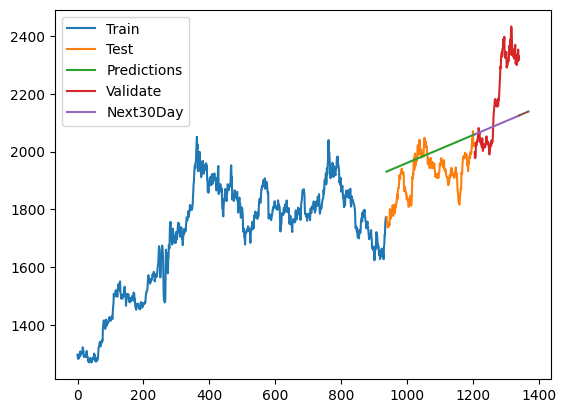

In [12]:
# Plot



plt.plot(train_data.index, train_data['close'])
plt.plot(test_data.index, test_data['close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index,val_data['close'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [13]:
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['close'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     2681.
Date:                Mon, 11 Nov 2024   Prob (F-statistic):          9.14e-322
Time:                        21:23:12   Log-Likelihood:                -8435.8
No. Observations:                1339   AIC:                         1.688e+04
Df Residuals:                    1337   BIC:                         1.689e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1472.5513      7.204    204.416      0.0

I. Analyze Residuals (7:2:1)

1. Residual Plot

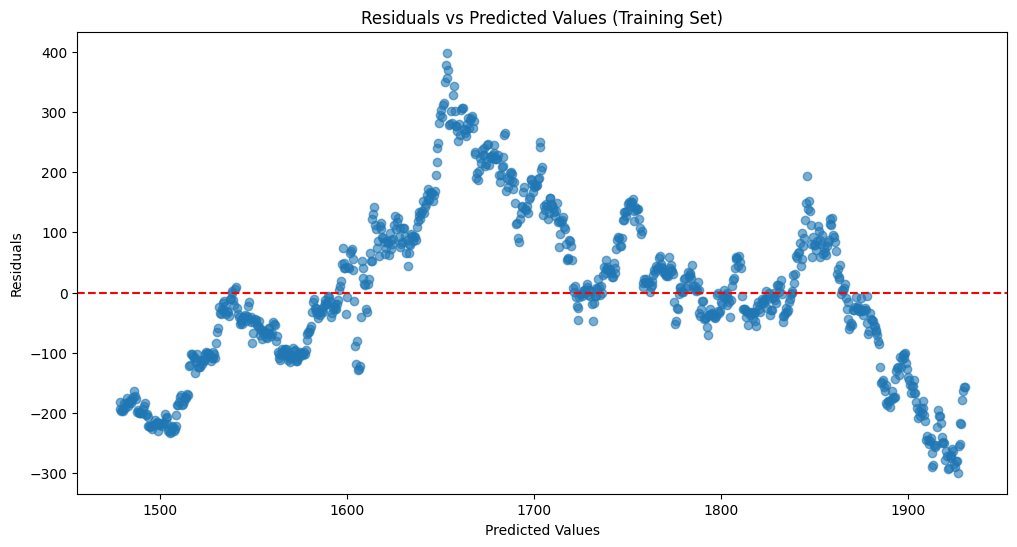

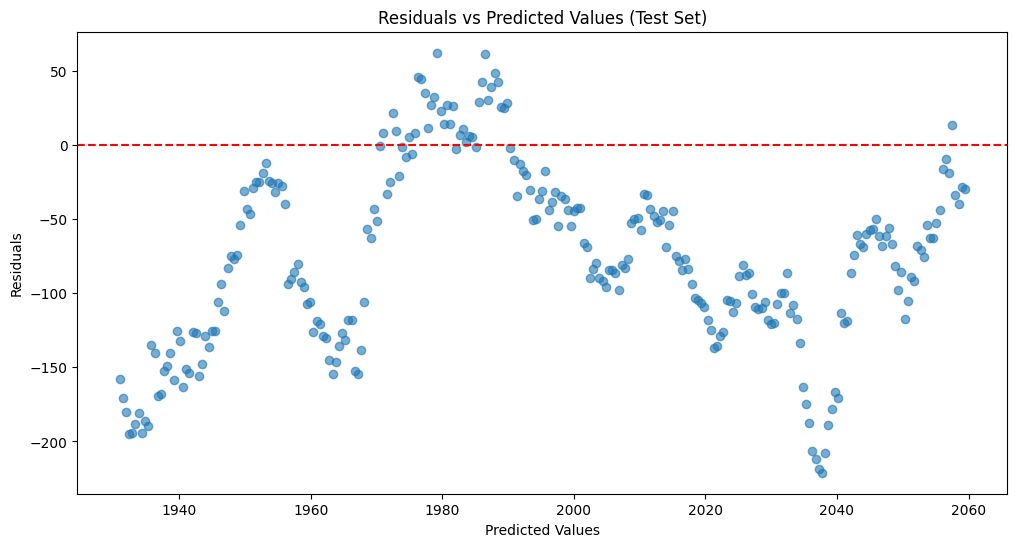

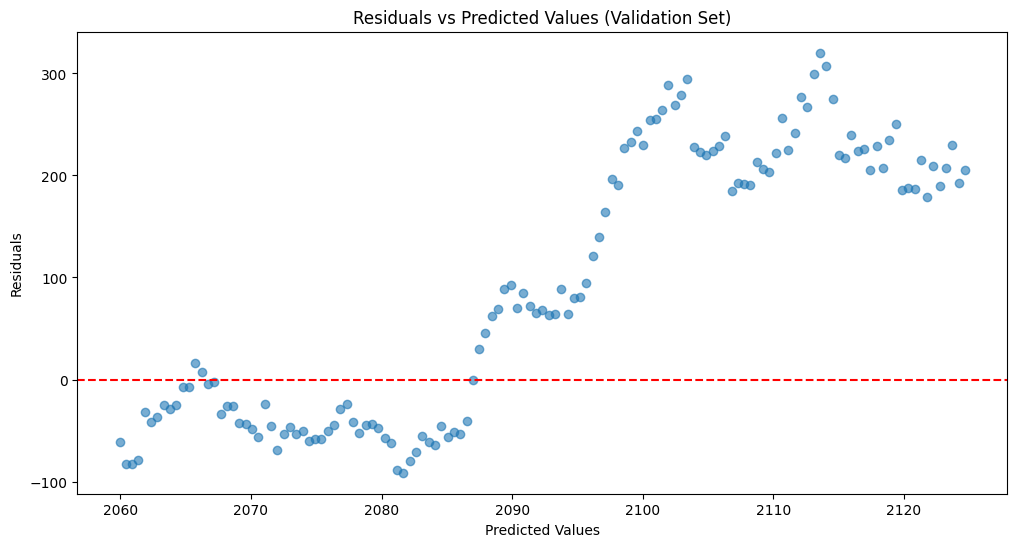

In [14]:
import matplotlib.pyplot as plt
# Calcualte y_pred_train
y_pred_train = model.predict(x_train)
# Giả sử bạn đã có các phần dư của từng tập dữ liệu
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred
residuals_val = y_val - y_pred_val

# Plotting residuals for the training set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_train, residuals_train, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Training Set)')
plt.show()

# Plotting residuals for the test set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals_test, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Test Set)')
plt.show()

# Plotting residuals for the validation set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_val, residuals_val, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Validation Set)')
plt.show()


2. Q-Q PLOT

<Figure size 800x600 with 0 Axes>

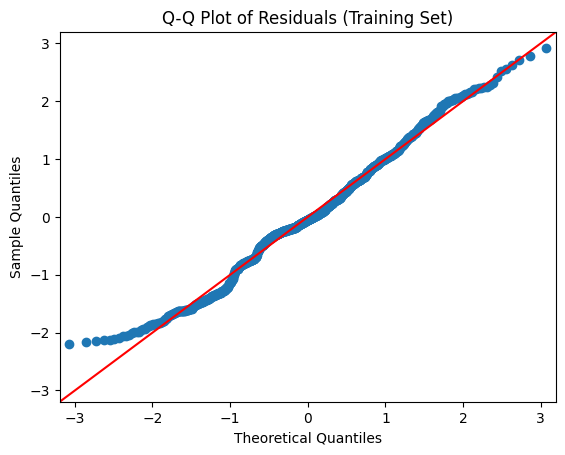

<Figure size 800x600 with 0 Axes>

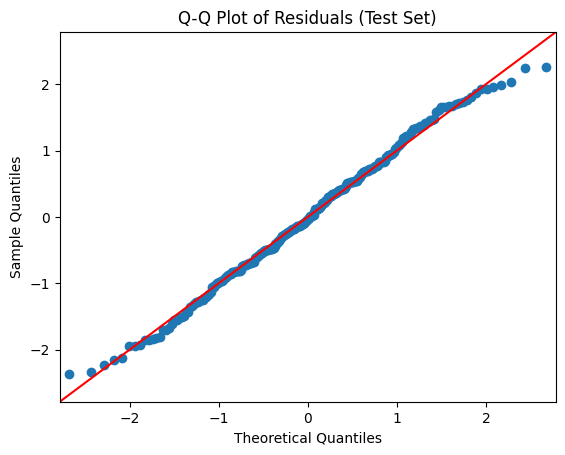

<Figure size 800x600 with 0 Axes>

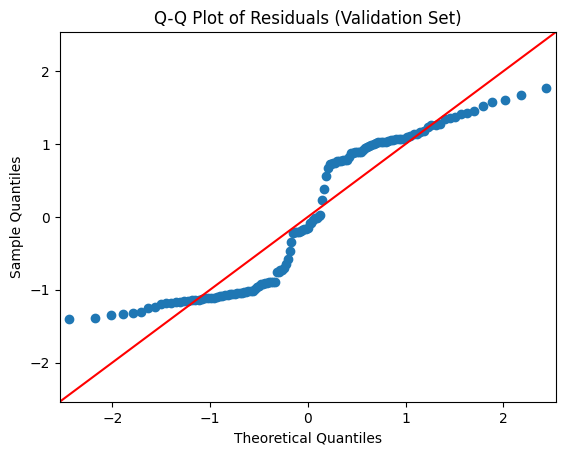

In [18]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Q-Q Plot cho tập huấn luyện (Training Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_train, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Training Set)')
plt.show()

# Q-Q Plot cho tập kiểm tra (Test Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_test, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Test Set)')
plt.show()

# Q-Q Plot cho tập kiểm định (Validation Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_val, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Validation Set)')
plt.show()


3. Durbin-Watson

In [19]:
from statsmodels.stats.stattools import durbin_watson

# Tính Durbin-Watson statistic cho tập huấn luyện (Training Set)
dw_train = durbin_watson(residuals_train)
print('Durbin-Watson statistic (Training Set):', dw_train)

# Tính Durbin-Watson statistic cho tập kiểm tra (Test Set)
dw_test = durbin_watson(residuals_test)
print('Durbin-Watson statistic (Test Set):', dw_test)

# Tính Durbin-Watson statistic cho tập kiểm định (Validation Set)
dw_val = durbin_watson(residuals_val)
print('Durbin-Watson statistic (Validation Set):', dw_val)


Durbin-Watson statistic (Training Set): 0.01752600592773891
Durbin-Watson statistic (Test Set): 0.02767484026525325
Durbin-Watson statistic (Validation Set): 0.016184953677937954


SPLITING DATA 6-3-1

In [20]:
# Split the data into training, testing, and validation sets (6:3:1)
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [21]:
# Part of preparing data for training model
x_train = np.array(train_data.index).reshape(-1, 1) #reshapes the array into a 2D array
y_train = np.array(train_data['close']) #converts the "close" column of the train_data DataFrame into a 1D NumPy array

In [22]:
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [23]:
# The trained model uses the x_test data to make predictions, and the predicted values are stored in y_pred.
# Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data["close"])
y_pred = model.predict(x_test)

# Validation process
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data["close"])
y_pred_val = model.predict(x_val)

In [24]:
# Create index predict for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[2367.62189734 2368.33633479 2369.05077223 2369.76520968 2370.47964712
 2371.19408456 2371.90852201 2372.62295945 2373.3373969  2374.05183434
 2374.76627179 2375.48070923 2376.19514667 2376.90958412 2377.62402156
 2378.33845901 2379.05289645 2379.7673339  2380.48177134 2381.19620879
 2381.91064623 2382.62508367 2383.33952112 2384.05395856 2384.76839601
 2385.48283345 2386.1972709  2386.91170834 2387.62614578 2388.34058323]


In [25]:
# Calculate accuracy for each model
# rmse
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)

test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

# mae
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

# mape
test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100


print("Testing RMSE: ", test_rmse)
print("Testing MAE: ", test_mae)
print("Testing MAPE: ", test_mape)
print("Validation RMSE: ", val_rmse)
print("Validation MAE: ", val_mae)
print("Validation MAPE: ", val_mape)

Testing RMSE:  277.04310222648695
Testing MAE:  266.23475724574286
Testing MAPE:  14.52089124125457
Validation RMSE:  182.4391456844227
Validation MAE:  145.85168271962127
Validation MAPE:  7.040996512179119


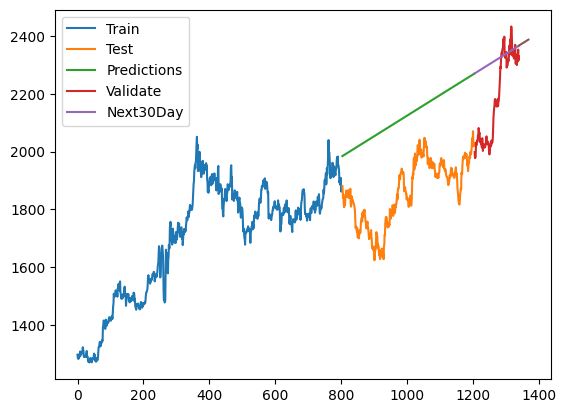

In [26]:
# Plot
plt.plot(train_data.index, train_data['close'])
plt.plot(test_data.index, test_data['close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index,val_data['close'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [27]:
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['close'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     2681.
Date:                Mon, 11 Nov 2024   Prob (F-statistic):          9.14e-322
Time:                        22:05:54   Log-Likelihood:                -8435.8
No. Observations:                1339   AIC:                         1.688e+04
Df Residuals:                    1337   BIC:                         1.689e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1472.5513      7.204    204.416      0.0

I. Analyze Residuals (6:3:1)

1. Residual Plot

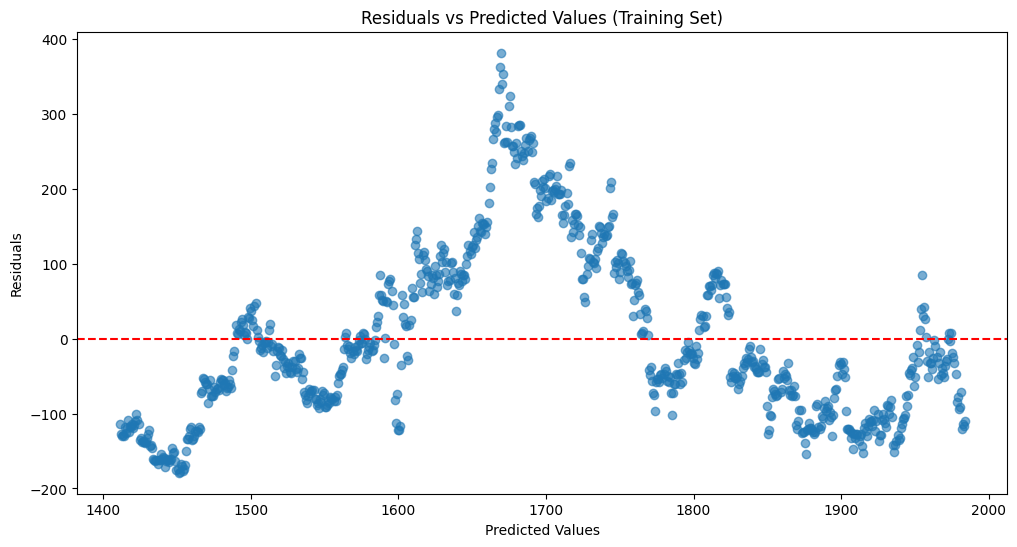

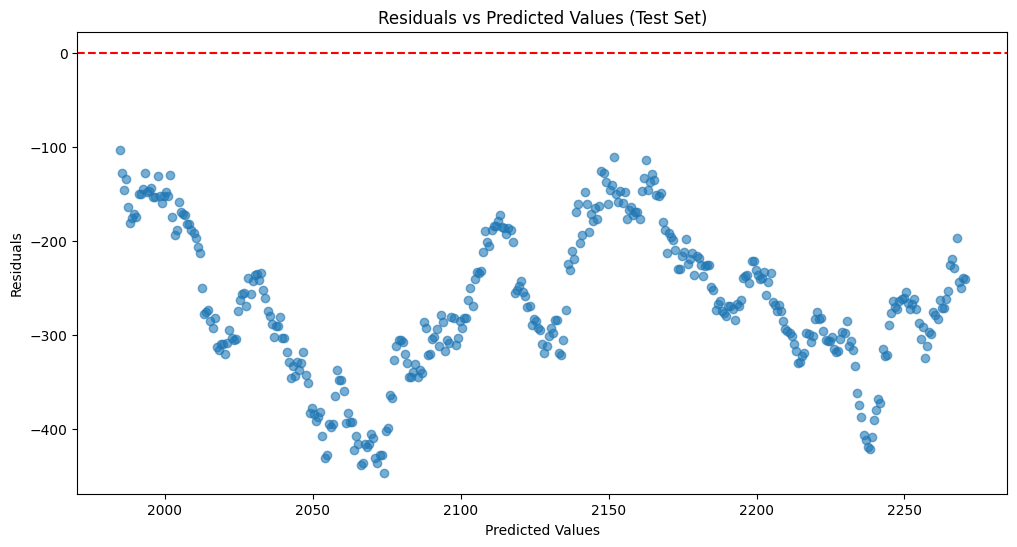

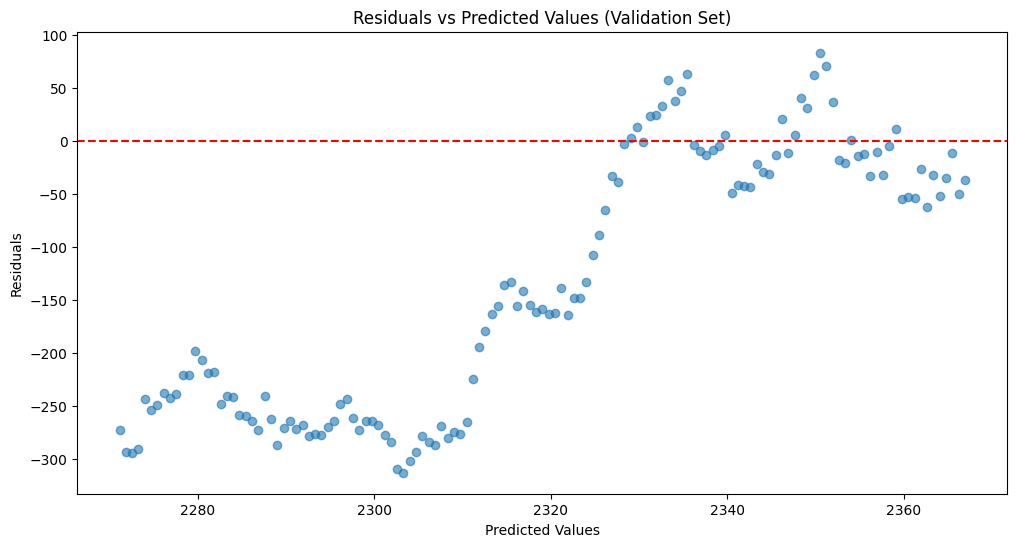

In [30]:
import matplotlib.pyplot as plt
# Calcualte y_pred_train
y_pred_train = model.predict(x_train)
# Giả sử bạn đã có các phần dư của từng tập dữ liệu
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred
residuals_val = y_val - y_pred_val

# Plotting residuals for the training set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_train, residuals_train, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Training Set)')
plt.show()

# Plotting residuals for the test set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals_test, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Test Set)')
plt.show()

# Plotting residuals for the validation set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_val, residuals_val, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Validation Set)')
plt.show()


2. Q-Q PLOTS

<Figure size 800x600 with 0 Axes>

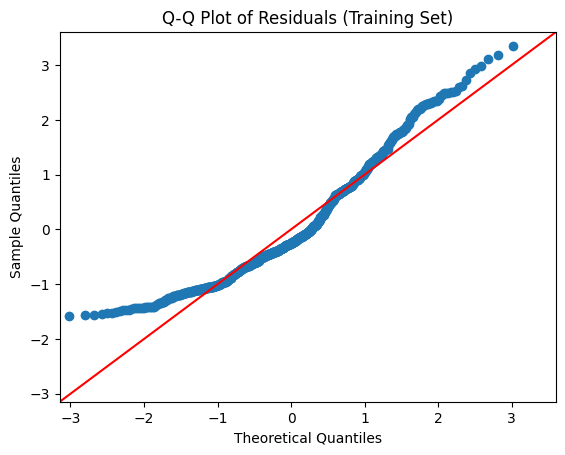

<Figure size 800x600 with 0 Axes>

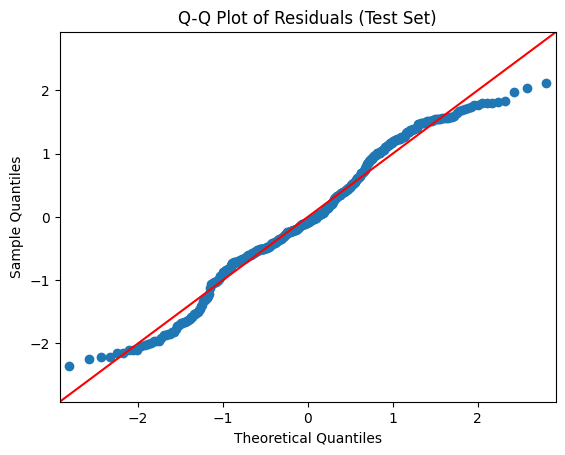

<Figure size 800x600 with 0 Axes>

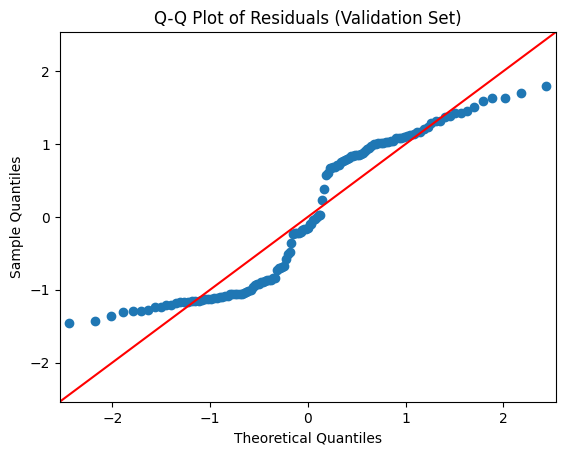

In [31]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Q-Q Plot cho tập huấn luyện (Training Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_train, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Training Set)')
plt.show()

# Q-Q Plot cho tập kiểm tra (Test Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_test, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Test Set)')
plt.show()

# Q-Q Plot cho tập kiểm định (Validation Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_val, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Validation Set)')
plt.show()


3. Durbin-Watson

In [33]:
from statsmodels.stats.stattools import durbin_watson

# Tính Durbin-Watson statistic cho tập huấn luyện (Training Set)
dw_train = durbin_watson(residuals_train)
print('Durbin-Watson statistic (Training Set):', dw_train)

# Tính Durbin-Watson statistic cho tập kiểm tra (Test Set)
dw_test = durbin_watson(residuals_test)
print('Durbin-Watson statistic (Test Set):', dw_test)

# Tính Durbin-Watson statistic cho tập kiểm định (Validation Set)
dw_val = durbin_watson(residuals_val)
print('Durbin-Watson statistic (Validation Set):', dw_val)


Durbin-Watson statistic (Training Set): 0.02598106371554942
Durbin-Watson statistic (Test Set): 0.003393371164752313
Durbin-Watson statistic (Validation Set): 0.0121519146988444


SPLITING DATA 5-3-2

In [34]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [35]:
# Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
result = model.fit(x_train, y_train)

# Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(x_test)

# Validation process
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['close'])
y_pred_val =  model.predict(x_val)
# Create index predict for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[2543.6763692  2544.55074573 2545.42512227 2546.2994988  2547.17387534
 2548.04825187 2548.92262841 2549.79700495 2550.67138148 2551.54575802
 2552.42013455 2553.29451109 2554.16888762 2555.04326416 2555.91764069
 2556.79201723 2557.66639376 2558.5407703  2559.41514683 2560.28952337
 2561.1638999  2562.03827644 2562.91265298 2563.78702951 2564.66140605
 2565.53578258 2566.41015912 2567.28453565 2568.15891219 2569.03328872]


In [36]:
# Calculate accuracy for each model
# rmse
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)

test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

# mae
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

# mape
test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100


print("Testing RMSE: ", test_rmse)
print("Testing MAE: ", test_mae)
print("Testing MAPE: ", test_mape)
print("Validation RMSE: ", val_rmse)
print("Validation MAE: ", val_mae)
print("Validation MAPE: ", val_mape)

Testing RMSE:  323.87774169584634
Testing MAE:  298.49303178007455
Testing MAPE:  16.56110473623904
Validation RMSE:  379.0636897474208
Validation MAE:  363.05859223740003
Validation MAPE:  18.079314210176282


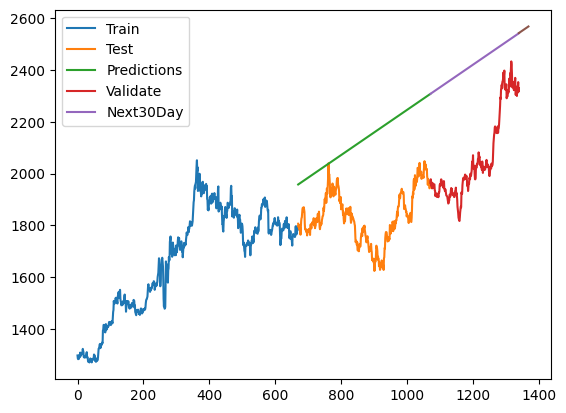

In [37]:
# Plot
plt.plot(train_data.index, train_data['close'])
plt.plot(test_data.index, test_data['close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index,val_data['close'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [38]:
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['close'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     2681.
Date:                Mon, 11 Nov 2024   Prob (F-statistic):          9.14e-322
Time:                        22:10:45   Log-Likelihood:                -8435.8
No. Observations:                1339   AIC:                         1.688e+04
Df Residuals:                    1337   BIC:                         1.689e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1472.5513      7.204    204.416      0.0

I. Analyze Residuals (5:3:2)

1. Residual Plot

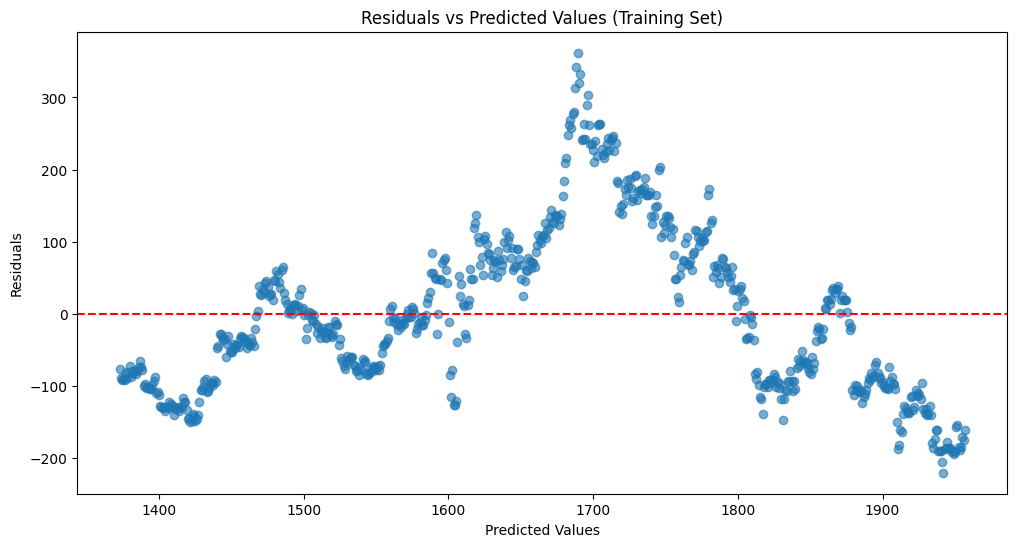

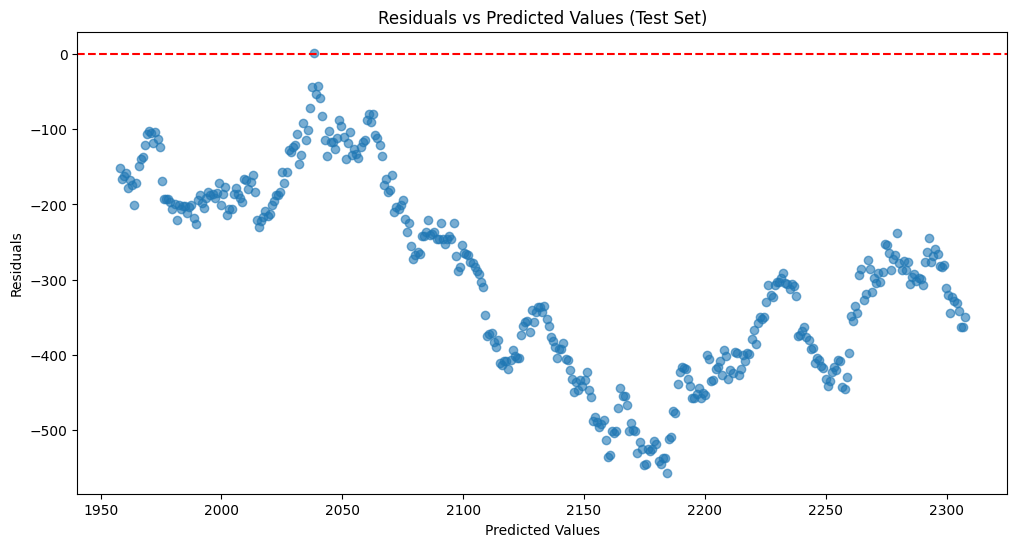

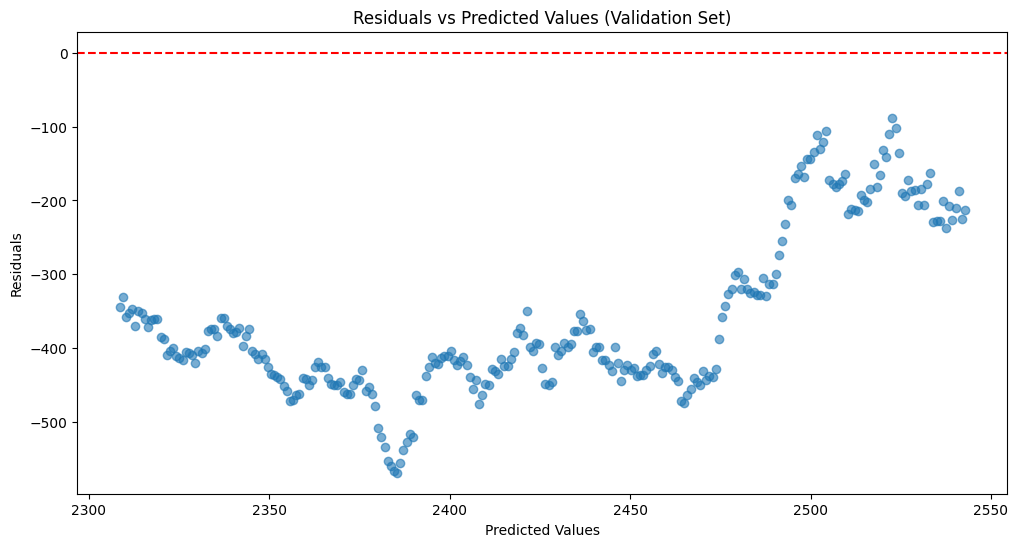

In [39]:
import matplotlib.pyplot as plt
# Calcualte y_pred_train
y_pred_train = model.predict(x_train)
# Giả sử bạn đã có các phần dư của từng tập dữ liệu
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred
residuals_val = y_val - y_pred_val

# Plotting residuals for the training set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_train, residuals_train, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Training Set)')
plt.show()

# Plotting residuals for the test set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals_test, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Test Set)')
plt.show()

# Plotting residuals for the validation set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_val, residuals_val, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Validation Set)')
plt.show()

2. Q-Q PLOTS:

<Figure size 800x600 with 0 Axes>

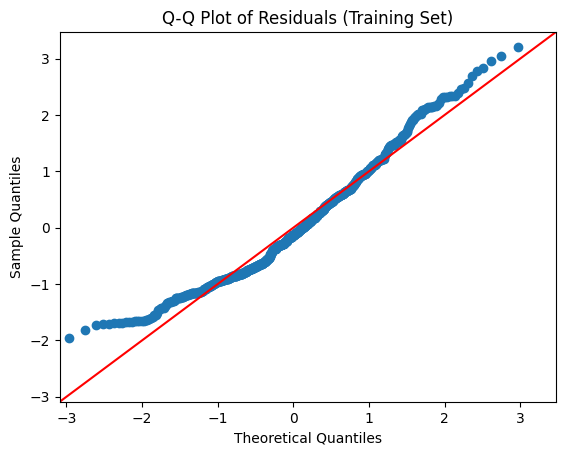

<Figure size 800x600 with 0 Axes>

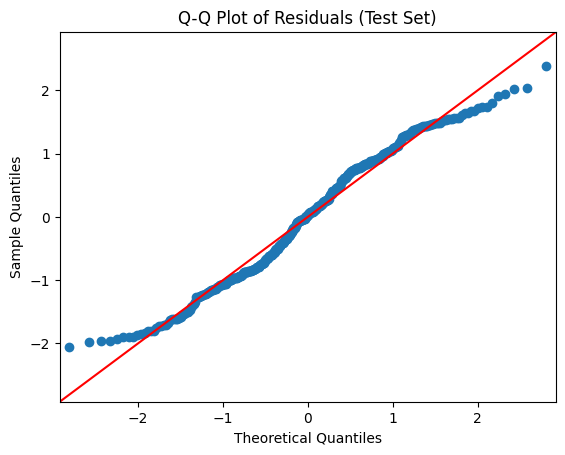

<Figure size 800x600 with 0 Axes>

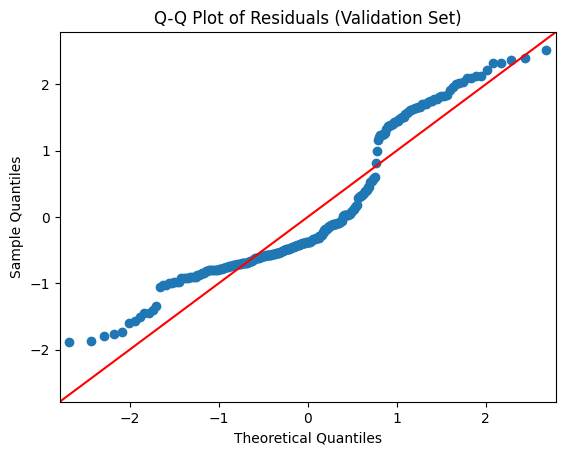

In [40]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Q-Q Plot cho tập huấn luyện (Training Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_train, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Training Set)')
plt.show()

# Q-Q Plot cho tập kiểm tra (Test Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_test, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Test Set)')
plt.show()

# Q-Q Plot cho tập kiểm định (Validation Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_val, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Validation Set)')
plt.show()

3. Durbin-Watson:


In [41]:
from statsmodels.stats.stattools import durbin_watson

# Tính Durbin-Watson statistic cho tập huấn luyện (Training Set)
dw_train = durbin_watson(residuals_train)
print('Durbin-Watson statistic (Training Set):', dw_train)

# Tính Durbin-Watson statistic cho tập kiểm tra (Test Set)
dw_test = durbin_watson(residuals_test)
print('Durbin-Watson statistic (Test Set):', dw_test)

# Tính Durbin-Watson statistic cho tập kiểm định (Validation Set)
dw_val = durbin_watson(residuals_val)
print('Durbin-Watson statistic (Validation Set):', dw_val)

Durbin-Watson statistic (Training Set): 0.026545787443613765
Durbin-Watson statistic (Test Set): 0.0029237424036987246
Durbin-Watson statistic (Validation Set): 0.0021160178859289374
